In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
y_train=y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [25]:
y_test=y_test.reshape(-1,)

In [53]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

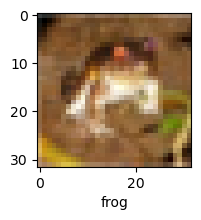

In [153]:
plot_sample(x_train,y_train,0)

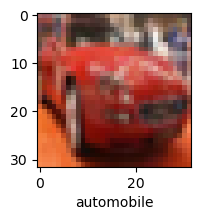

In [155]:
plot_sample(x_train,y_train,5)

In [61]:
x_train=x_train/255
x_test=x_test/255

In [81]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [83]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 140ms/step - accuracy: 0.2750 - loss: 2.2045
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 311s 199ms/step - accuracy: 0.3923 - loss: 1.6840
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 240s 147ms/step - accuracy: 0.4260 - loss: 1.6021
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 146ms/step - accuracy: 0.4514 - loss: 1.5447
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - accuracy: 0.4646 - loss: 1.4973


In [91]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred
y_pred_classes=[np.argmax(elements) for elements in y_pred]
y_pred_classes
print('classification_report\n :',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
classification_report
 :               precision    recall  f1-score   support

           0       0.49      0.58      0.53      1000
           1       0.57      0.59      0.58      1000
           2       0.29      0.44      0.35      1000
           3       0.33      0.32      0.32      1000
           4       0.50      0.22      0.31      1000
           5       0.37      0.36      0.37      1000
           6       0.50      0.54      0.51      1000
           7       0.53      0.51      0.52      1000
           8       0.57      0.57      0.57      1000
           9       0.55      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



In [113]:
x_train = x_train.reshape(-1, 32, 32, 3)

In [117]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=((3,3)),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=((3,3)),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


In [119]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.3754 - loss: 1.7072
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6006 - loss: 1.1421
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6574 - loss: 0.9809
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6873 - loss: 0.9046
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7096 - loss: 0.8391
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7371 - loss: 0.7690
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7478 - loss: 0.7232
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7668 - loss: 0.6820
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7765 - loss: 0.6411
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7840 - loss: 0.6142


In [123]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7077 - loss: 0.9162


[0.93900066614151, 0.7014999985694885]

In [135]:
y_pred1=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [137]:
y_pred1

array([[9.5284719e-04, 2.5051253e-02, 4.2490148e-05, ..., 1.0664957e-05,
        1.2234554e-01, 1.0679420e-02],
       [3.4273334e-03, 5.8703505e-02, 4.7880096e-08, ..., 6.3080785e-09,
        9.3784183e-01, 2.7000055e-05],
       [1.2013963e-02, 9.5301215e-03, 5.8970381e-05, ..., 2.5498404e-04,
        9.6370912e-01, 1.4115359e-02],
       ...,
       [2.2454677e-05, 1.7923434e-06, 1.3586915e-01, ..., 1.8615894e-01,
        6.3354912e-04, 4.1977651e-06],
       [7.6538301e-03, 9.3846929e-01, 7.0122056e-05, ..., 1.3995370e-04,
        5.7136699e-06, 2.6228308e-04],
       [1.8496947e-06, 2.8183988e-06, 9.9367953e-06, ..., 9.9993896e-01,
        3.1327652e-08, 7.3661499e-07]], dtype=float32)

In [167]:
y_pred_classes=[np.argmax(element) for element in y_pred1]
y_pred_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [169]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [171]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

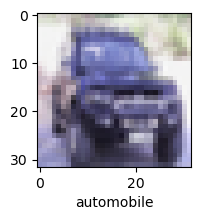

In [173]:
plot_sample(x_test,y_test,9)

In [175]:
classes[y_pred_classes[9]]

'automobile'